In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [165]:
new = np.array([0,0,0,1,0,1,1,1,0])

In [166]:
np.unique(new, return_counts = True)

(array([0, 1]), array([5, 4]))

In [147]:
X1 = np.random.randn(200,2)+2
X2 = np.random.randn(200,2)-.5
X3 = np.random.randn(200,2)+[-2,3]
X4 = np.random.randn(200,2)*[.5,.5]+ [0,7]
outs1 = np.random.randn(20,2)+[-4,5]
outs2 = np.random.randn(20,2)+[4,-2]
X = np.row_stack((X1,X2,X3,X4,outs1,outs2))
Y = np.row_stack((np.ones((200,1)),np.zeros((200,1)),2*np.ones((200,1)),3*np.ones((200,1)),np.ones((20,1)),2*np.ones((20,1))))

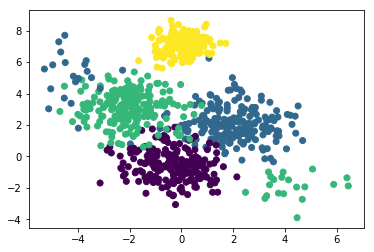

In [148]:
plt.scatter(X[:,0],X[:,1], c = Y.T.astype(int).tolist()[0])

In [149]:
def dist(a,b):
    return np.sum((a-b)**2, axis  = 1)

In [150]:
newX = np.random.uniform(low = -9,high = 9,size = (1000,2))

In [155]:
D = np.empty((len(newX),len(X)))
for i in range(len(newX)):
    D[i,] = dist(X,newX[i])
prednum = np.argsort(D, axis = 1)[:,0:5]

In [156]:
newYs = Y[prednum]

In [157]:
predY = []
for i in range(len(newYs)):
    uniques, counts = np.unique(newYs[i], return_counts = True)
    newcounts = counts[np.argsort(counts)]
    newercounts = (newcounts == np.max(newcounts))
    num = np.sum(newercounts).astype(int)
    index = np.random.randint(0,num)
    predY.append(uniques[np.argsort(counts)[-num]])

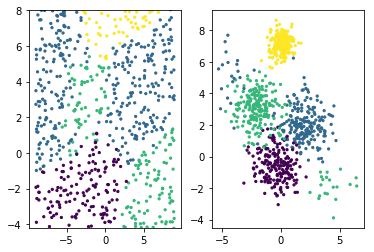

In [163]:
plt.subplot(1,2,1)
plt.scatter(newX[:,0],newX[:,1],c = predY, s = 5)
plt.ylim(-4.2,8)
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1], c = Y.T.astype(int).tolist()[0], s = 5)

In [159]:
labDs = D[prednum]
weights = 1/(labDs+1e-10)
predY = []
for i in range(len(newYs)):
    indices = np.argsort(newYs[i])
    indYs = newYs[i][indices]
    indws = weights[i][indices]
    uniques = np.unique(indYs)
    tots = []
    newy = []
    for j in range(len(uniques)):
        newy.append(uniques[j])
        tots.append(np.sum(indws[np.where(indYs == uniques[j])]))
    predY.append(newy[np.argsort(tots)[-1]])
    

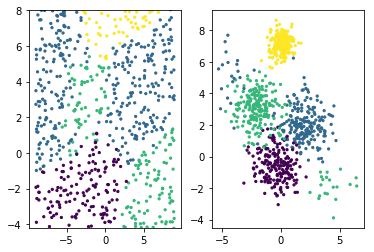

In [164]:
plt.subplot(1,2,1)
plt.scatter(newX[:,0],newX[:,1],c = predY, s = 5)
plt.ylim(-4.2,8)
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1], c = Y.T.astype(int).tolist()[0], s = 5)